In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd

def overlay_image_alpha(img, img_overlay, pos, alpha_mask):

    x, y = pos

    y1, y2 = max(0, y), min(img.shape[0], y + img_overlay.shape[0])
    x1, x2 = max(0, x), min(img.shape[1], x + img_overlay.shape[1])

    y1o, y2o = max(0, -y), min(img_overlay.shape[0], img.shape[0] - y)
    x1o, x2o = max(0, -x), min(img_overlay.shape[1], img.shape[1] - x)

    if y1 >= y2 or x1 >= x2 or y1o >= y2o or x1o >= x2o:
        return

    channels = img.shape[2]

    alpha = alpha_mask[y1o:y2o, x1o:x2o]
    alpha_inv = 1.0 - alpha

    for c in range(channels):
        img[y1:y2, x1:x2, c] = (alpha * img_overlay[y1o:y2o, x1o:x2o, c] +
                                alpha_inv * img[y1:y2, x1:x2, c])

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_alt.xml')
eye_cascade = cv.CascadeClassifier('frontalEyes35x16.xml')
nose_cascade = cv.CascadeClassifier('Nose18x15.xml')

img = cv.imread('Before.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

glasses = cv.imread('glasses.png',-1)
mustache = cv.imread('mustache.png',-1)

# cv.imshow('Jamie',gray)

eye = eye_cascade.detectMultiScale(gray, 1.1, 5)
for x,y,w,h in eye:
	# cv.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
	glasses = cv.resize(glasses, (h,w))
	overlay_image_alpha(img, glasses[:,:,0:3], (x,y), glasses[:,:,3]/255.0)
	
nose = nose_cascade.detectMultiScale(gray, 1.1, 5)
for x,y,w,h in nose:
	# cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
	mustache = cv.resize(mustache, (h+w,w))
	h = int(h/2)
	w = int(w/2)
	overlay_image_alpha(img, mustache[:,:,0:3], (x-w,y+h), mustache[:,:,3]/255.0)

cv.imshow('Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

# Convert into csv
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
prediction = np.array(img)
prediction = prediction.reshape((-1,3))
print(prediction.shape)

df = pd.DataFrame(data = prediction, columns=['Channel 1', 'Channel 2', 'Channel 3'])
df.to_csv('result.csv',index=False)


In [1]:
import cv2 as cv
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import math

In [3]:
#img1=cv.imread('jamie_.jpg')
#img1=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
#plt.imshow(img1)

In [4]:
#img2=cv.imread('jamie1_.jpg')
#img2=cv.cvtColor(img2,cv.COLOR_BGR2RGB)
#plt.imshow(img2)

In [5]:
#print(type(img1))

In [6]:
#print(img1)
#print(img1.shape)

In [7]:
#print(img2)
#print(img2.shape)

In [8]:
#img2 = img2[:,:268,:]

In [9]:
#print(img2.shape)
#plt.imshow(img2)
#plt.imshow(img1)
#plt.show


In [10]:
#img3 = np.diff?

In [11]:
#img3 = np.diff

In [12]:
#img3 = np.zeros(img1.shape)
#for i in range (img1.shape[0]):
 #   for j in range (img1.shape[1]):
  #      for k in range (img1.shape[2]):
   #         img3[i][j][k] = int(img2[i][j][k])-int(img1[i][j][k])

In [13]:
#print(img3.shape)

In [14]:
#print(img3)

In [15]:
#plt.imshow(img3)

In [2]:
glasses= cv.imread("./Dataset/glasses.png",cv.IMREAD_UNCHANGED)
mooch= cv.imread("./Dataset/mustache.png",cv.IMREAD_UNCHANGED)

In [3]:
img_before = cv.imread("./Dataset/Jamie_Before.jpg")
img_after = cv.imread("./Dataset/Jamie_After.jpg")

In [4]:
eye_cascade = cv.CascadeClassifier('./Dataset/third-party/frontalEyes35x16.xml')
nose_cascade = cv.CascadeClassifier('./Dataset/third-party/Nose18x15.xml')

In [5]:
def detecteye(img_):
    eyes= eye_cascade.detectMultiScale(img_,1.3,5)
    
        
    for eye in eyes:
        x1,y1,w1,h1 =eye
            #eye_section =img_[y1-10:y1+h1+10,x1-10:x1+w1+10];
            #eye_section =cv.resize(eye_section,(100,100))
        return eye
def detectnose(img_):
    noses= nose_cascade.detectMultiScale(img_,1.3,5)    
    for nose in noses:
        x2,y2,w2,h2 =nose
            #nose_section =img_[y2-10:y2+h2+10,x2-10:x2+w2+10];
            #nose_section =cv.resize(nose_section,(100,100))
        return nose
            
        


In [6]:
eye_ = detecteye(img_before)
nose_= detectnose(img_before)

In [7]:
print(eye_)

[189 336 170 371]


In [8]:
print(nose_)

[312 487 107 129]


In [9]:
print(glasses.shape)

(221, 483, 4)


In [10]:
print(mooch.shape)

(320, 640, 4)


In [11]:
print(img_before.shape)

(1024, 733, 3)


(170, 371, 4)


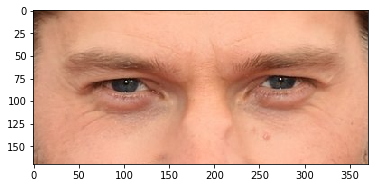

In [12]:
img1=img2=cv.cvtColor(img_before,cv.COLOR_BGR2RGBA) #for A is forth parameter alpha(obesity)
eye_img=img1[eye_[1]:eye_[1]+eye_[2],eye_[0]:eye_[0]+eye_[3]]
plt.imshow(eye_img)
print(eye_img.shape)
plt.show()

(107, 129, 4)


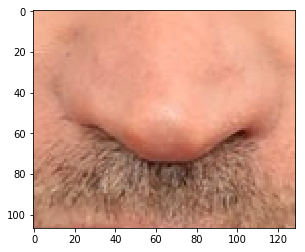

In [13]:
nose_img = img1[487:487+107,312:312+129]
plt.imshow(nose_img)
print(nose_img.shape)
plt.show()

In [14]:
glasses = cv.resize(glasses,dsize = (371,170))
mooch = cv.resize(mooch,dsize = (129,107))

(170, 371, 4)


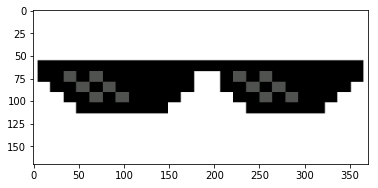

In [15]:
glasses = cv.cvtColor(glasses,cv.COLOR_BGR2RGBA)

plt.imshow(glasses)
print(glasses.shape)

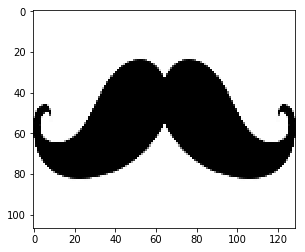

In [16]:
mooch = cv.cvtColor(mooch,cv.COLOR_BGR2RGBA)
glass_final = np.zeros(img1.shape)
plt.imshow(mooch)

In [17]:
y_offset =eye_[1]
x_offset= eye_[0]   # [189 336 170 371]

y1, y2 = y_offset, y_offset + eye_[2]
x1, x2 = x_offset, x_offset + eye_[3]

alpha_s = glasses[:, :, 3] /255
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
    img2[y1:y2, x1:x2, c] = (alpha_s * glasses[:, :, c] +
                              alpha_l * img2[y1:y2, x1:x2, c])

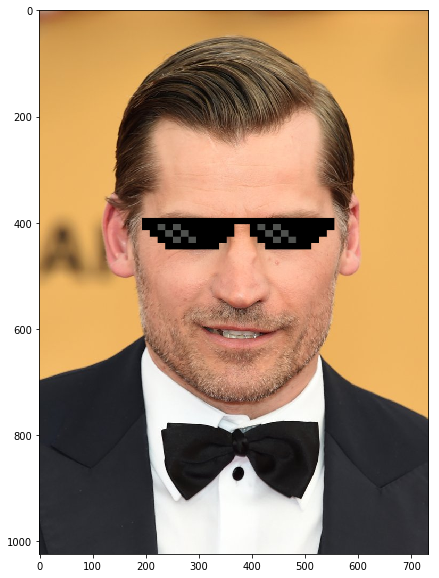

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(img1)

In [19]:
y1_offset =nose_[1]+50 # 50 to push mustach down
x1_offset= nose_[0]   #312 487 107 129

y1a, y2a = y1_offset, y1_offset + nose_[2]
x1a, x2a = x1_offset, x1_offset + nose_[3]

alpha_sa = mooch[:, :, 3] /255
alpha_la = 1.0 - alpha_sa

for ca in range(0, 3):
    img2[y1a:y2a, x1a:x2a, ca] = (alpha_sa * mooch[:, :, ca] +
                              alpha_la * img2[y1a:y2a, x1a:x2a, ca])

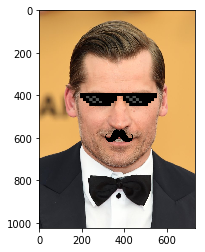

In [20]:
plt.imshow(img2)

In [21]:


test_img = cv.imread('./Testcase/Before.png')

In [22]:
eye_1 = detecteye(test_img)
nose_1= detectnose(test_img)

In [23]:
print(eye_1)
print(nose_1)

[ 95 118  59 130]
[125 167  51  61]


(59, 130, 4)


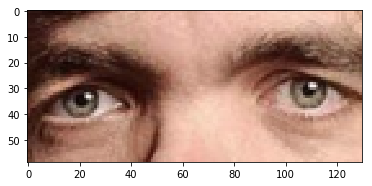

In [24]:
tstimg=cv.cvtColor(test_img,cv.COLOR_BGR2RGBA) #for A is forth parameter alpha(obesity)
eye_img1=tstimg[eye_1[1]:eye_1[1]+eye_1[2],eye_1[0]:eye_1[0]+eye_1[3]]
plt.imshow(eye_img1)
print(eye_img1.shape)
plt.show()

(51, 61, 4)


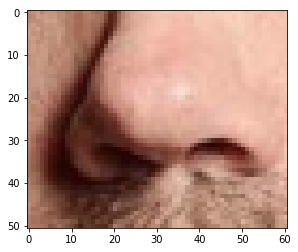

In [25]:
tstimg=cv.cvtColor(test_img,cv.COLOR_BGR2RGBA) #for A is forth parameter alpha(obesity)
nose_img1=tstimg[nose_1[1]:nose_1[1]+nose_1[2],nose_1[0]:nose_1[0]+nose_1[3]]
plt.imshow(nose_img1)
print(nose_img1.shape)
plt.show()

In [26]:
glasses = cv.resize(glasses,dsize = (130,59))
mooch = cv.resize(mooch,dsize = (61,51))

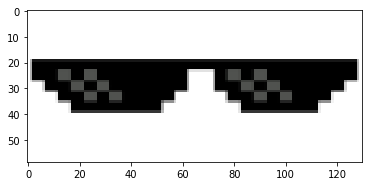

In [27]:
plt.imshow(glasses)
glasses = cv.cvtColor(glasses,cv.COLOR_BGR2RGBA)
plt.show()

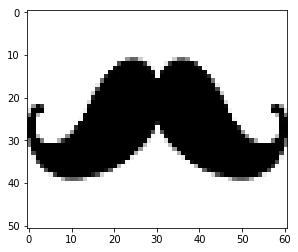

In [28]:
plt.imshow(mooch)
mooch = cv.cvtColor(mooch,cv.COLOR_BGR2RGBA)
plt.show()

In [29]:
y_offset =eye_1[1]
x_offset= eye_1[0]   # [189 336 170 371]

y1, y2 = y_offset, y_offset + eye_1[2]
x1, x2 = x_offset, x_offset + eye_1[3]

alpha_s = glasses[:, :, 3] /255
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
    tstimg[y1:y2, x1:x2, c] = (alpha_s * glasses[:, :, c] +
                              alpha_l * tstimg[y1:y2, x1:x2, c])

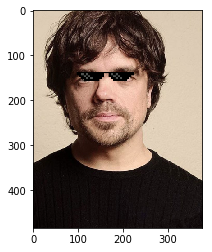

In [30]:
plt.imshow(tstimg)

In [31]:
y1_offset =nose_1[1] 
x1_offset= nose_1[0]   #312 487 107 129

y1a, y2a = y1_offset, y1_offset + nose_1[2]
x1a, x2a = x1_offset, x1_offset + nose_1[3]

alpha_sa = mooch[:, :, 3] /255
alpha_la = 1.0 - alpha_sa

for ca in range(0, 3):
    tstimg[y1a:y2a, x1a:x2a, ca] = (alpha_sa * mooch[:, :, ca] +
                              alpha_la * tstimg[y1a:y2a, x1a:x2a, ca])

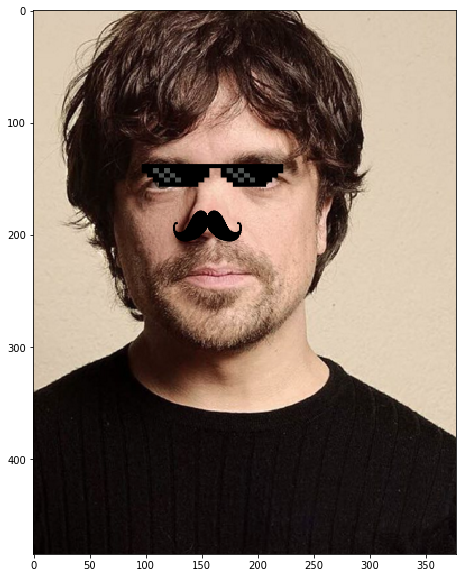

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(tstimg)
plt.show()

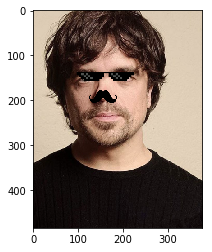

In [33]:
#tstimg=tstimg=cv.cvtColor(tstimg,cv.COLOR_RGBA2RGB)

plt.imshow(tstimg)
plt.show()

In [44]:
zzz = np.reshape(tstimg, (-1,3))
print(zzz)

[[219 202 180]
 [220 203 181]
 [219 202 180]
 ...
 [ 19  13  13]
 [ 21  15  15]
 [ 22  15  15]]


In [50]:
tstimg.shape

(485, 377, 3)

In [55]:
lll = tstimg.flatten("F")
lll.shape

(548535,)

In [45]:
Xsub = np.array(ll)
print(Xsub)
print(Xsub.shape)

[[219 202 180]
 [220 203 181]
 [219 202 180]
 ...
 [ 19  13  13]
 [ 21  15  15]
 [ 22  15  15]]
(182845, 3)


In [47]:
ssss = pd.DataFrame(Xsub)
ssss.to_csv("./submission.csv", index = False)

In [56]:
print(tstimg)

[[[219 202 180]
  [220 203 181]
  [219 202 180]
  ...
  [215 197 175]
  [216 199 174]
  [214 199 173]]

 [[219 202 180]
  [220 203 181]
  [219 202 180]
  ...
  [215 198 176]
  [216 199 175]
  [214 199 173]]

 [[219 202 180]
  [220 203 181]
  [219 202 180]
  ...
  [215 198 176]
  [216 199 175]
  [214 199 173]]

 ...

 [[  6   2   1]
  [  5   1   0]
  [  6   2   1]
  ...
  [ 27  21  21]
  [ 26  20  20]
  [ 17  10  10]]

 [[  7   3   2]
  [  6   2   1]
  [  5   1   0]
  ...
  [ 22  16  16]
  [ 21  15  15]
  [ 22  16  16]]

 [[  7   3   2]
  [  5   1   0]
  [  5   1   0]
  ...
  [ 19  13  13]
  [ 21  15  15]
  [ 22  15  15]]]


In [57]:
#R G B
# R

R= tstimg[:,:,0]


[[219 220 219 ... 215 216 214]
 [219 220 219 ... 215 216 214]
 [219 220 219 ... 215 216 214]
 ...
 [  6   5   6 ...  27  26  17]
 [  7   6   5 ...  22  21  22]
 [  7   5   5 ...  19  21  22]]


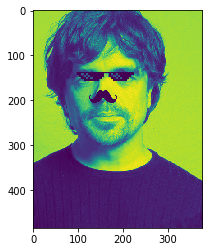

In [58]:
print(R)
plt.imshow(R)

In [59]:
R1=R.flatten((-1,3))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  """Entry point for launching an IPython kernel.


In [60]:
 #g
G = tstimg[:,:,1]

[[202 203 202 ... 197 199 199]
 [202 203 202 ... 198 199 199]
 [202 203 202 ... 198 199 199]
 ...
 [  2   1   2 ...  21  20  10]
 [  3   2   1 ...  16  15  16]
 [  3   1   1 ...  13  15  15]]


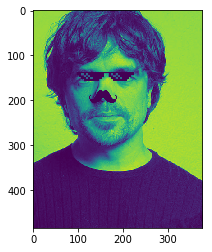

In [61]:
print(G)
plt.imshow(G)

In [62]:
G1=G.flatten((-1,3))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  """Entry point for launching an IPython kernel.


In [63]:
B = tstimg[:,:,2]

[[180 181 180 ... 175 174 173]
 [180 181 180 ... 176 175 173]
 [180 181 180 ... 176 175 173]
 ...
 [  1   0   1 ...  21  20  10]
 [  2   1   0 ...  16  15  16]
 [  2   0   0 ...  13  15  15]]


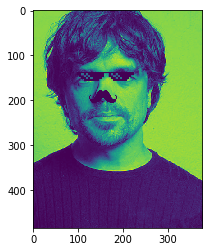

In [64]:
print(B)
plt.imshow(B)

In [65]:
B1=B.flatten((-1,3))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  """Entry point for launching an IPython kernel.


In [66]:
print(R1.shape,G1.shape,B1.shape)

(182845,) (182845,) (182845,)


In [67]:
y_pred = np.zeros?


In [ ]:
y_pred = np.zeros

In [68]:
y_pred = np.zeros((182845, 3),dtype=int )

In [69]:
print(y_pred)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [70]:
y_pred[:,0]=B1

In [71]:
y_pred[:,1]=G1

In [72]:
y_pred[:,2]=R1

In [73]:
y= y_pred

In [74]:
print(y_pred)
print(y_pred.shape)

[[180 202 219]
 [180 202 219]
 [180 202 219]
 ...
 [ 10  10  17]
 [ 16  16  22]
 [ 15  15  22]]
(182845, 3)


In [75]:
import csv
y_pred=pd.DataFrame(data = y_pred , columns=['Channel 1', 'Channel 2', 'Channel 3'])
y_pred.to_csv("submission_FILTER17.csv",index = False)

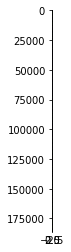

In [76]:
plt.imshow(y)

In [32]:
img3 = cv.imread('sample.jpg')
img3 = cv.cvtColor(img3,cv.COLOR_BGR2RGBA)

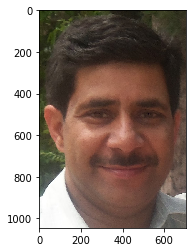

In [33]:
plt.imshow(img3)
plt.show()

In [34]:
eye_2= detecteye(img3)
nose_2= detectnose(img3)

In [35]:
print(nose_2)
print(nose_2.shape)

[299 551 190 227]
(4,)


(190, 227, 4)


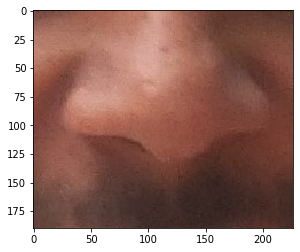

In [36]:
nose_img2=img3[nose_2[1]:nose_2[1]+nose_2[2],nose_2[0]:nose_2[0]+nose_2[3]]
plt.imshow(nose_img2)
print(nose_img2.shape)
plt.show()

In [37]:
mooch = cv.resize(mooch,dsize = (227,190))

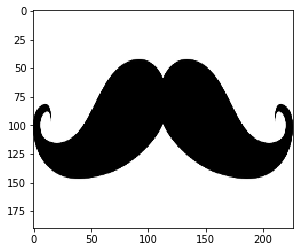

In [38]:
plt.imshow(mooch)
mooch = cv.cvtColor(mooch,cv.COLOR_BGR2RGBA)
plt.show()

In [39]:
y1_offset =nose_2[1]+70 
x1_offset= nose_2[0]   #312 487 107 129

y1a, y2a = y1_offset, y1_offset + nose_2[2]
x1a, x2a = x1_offset, x1_offset + nose_2[3]

alpha_sa = mooch[:, :, 3] /255
alpha_la = 1.0 - alpha_sa

for ca in range(0, 3):
    img3[y1a:y2a, x1a:x2a, ca] = (alpha_sa * mooch[:, :, ca] +
                              alpha_la * img3[y1a:y2a, x1a:x2a, ca])

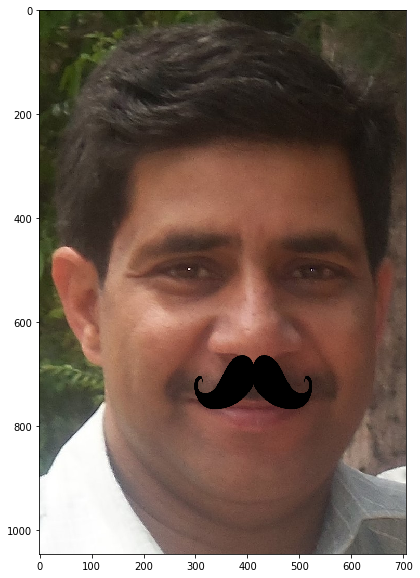

In [51]:

plt.figure(figsize=(10,10))
plt.imshow(img3)
plt.show()